## Select region of the ocean
Code select some region of the ocean and save data from there

In [41]:
import xarray as xr
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


# visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [3]:
# using the previously downloaded files
ds = xr.open_dataset('data/gdp_fullset_with_filtered.nc')
ds.load()

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 2578 2582 2583 ... 61493010 61493020
    lon                    (obs) float32 -47.95 -47.96 -47.96 ... 32.84 32.84
    lat                    (obs) float32 47.48 47.47 47.45 ... -25.54 -25.54
    time                   (obs) datetime64[ns] 2005-04-15T20:00:00 ... 2016-...
    ids                    (obs) int64 2578 2578 2578 ... 61493020 61493020
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 5137 4289 1024 1095 ... 14769 16695 5209
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 4400505 4400506 0 ... 1601501 1601502
    expno                  (traj) int32 9046 9046 46 9046 ... 20921 20921 20921
    deploy_date            (traj) datetime64[ns] 2005-04-15 ... 2016-04-09
    deploy_lon             (traj) float32 -48.0 -52.0 -50.02 ... 65.0 75.4 54.3
    ...                     ...
    err_sst2               (obs) float32 0.03 0.027 0.021 0.016 ... nan nan nan
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 0 0 0 0 0 0 0 0 0
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 0 0 0 0 0 0 0 0 0
    flg_sst2               (obs) int8 5 5 5 5 2 2 2 5 5 5 ... 0 0 0 0 0 0 0 0 0
    u_lp                   (obs) float64 -0.1712 -0.1206 ... -0.02866 -0.0293
    v_lp                   (obs) float64 0.2094 0.1201 ... 0.09597 0.09665
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [4]:
# Open the binned stats to select region

ds_stats = xr.open_dataset('data/binned_stats.nc')

In [5]:
def retrieve_region(ds, lon: list = None, lat: list = None, time: list = None) -> xr.Dataset:
    '''Subset the dataset for a region in space and time
    
    Args:
        ds: xarray Dataset
        lon: longitude slice of the subregion
        lat: latitude slice of the subregion
        time: tiem slice of the subregion
    
    Returns: 
        ds_subset: Dataset of the subregion
    '''
    
    # define the mask for the 'obs' dimension
    mask = np.ones(ds.dims['obs'], dtype='bool')

    if lon:
        mask &= (ds.coords['lon'] >= lon[0]).values
        mask &= (ds.coords['lon'] <= lon[1]).values

    if lat:
        mask &= (ds.coords['lat'] >= lat[0]).values
        mask &= (ds.coords['lat'] <= lat[1]).values

    if time:
        mask &= (ds.coords['time'] >= np.datetime64(time[0])).values
        mask &= (ds.coords['time'] <= np.datetime64(time[1])).values
    
    # define the mask for the 'traj' dimension using the ID numbers from the masked observation
    mask_id = np.in1d(ds.ID, np.unique(ds.ids[mask]))
    ds_subset = ds.isel(obs=np.where(mask)[0], traj=np.where(mask_id)[0])

    return ds_subset.compute()

In [62]:
# Select some region to do ands_statss

# ACC
#lon = [-15, 5]
#lat = [-55, -35]
lon_acc = [-70, -45]
lat_acc = [-62, -55]

# Agulhas
lon_agu = [-35, 5]
lat_agu = [-40, -25]

# N Atl (west)
lon_wnatl = [-75, -55]
lat_wnatl = [20, 30]

# N Atl (east)
lon_enatl= [-50, -25]
lat_enatl= [20, 30]

# Indian Ocean 
lon_ind = [60,100]
lat_ind = [-40, -20]

##
lon = lon_ind
lat = lat_ind

day0 = datetime(2000,1,1).strftime('%Y-%m-%d')
day1 = datetime(2020,12,31).strftime('%Y-%m-%d')
days = [day0, day1]
ds_subset = retrieve_region(ds, lon, lat, days)

In [55]:
ds_subset

<xarray.Dataset>
Dimensions:                (traj: 548, obs: 3029517)
Coordinates:
    ID                     (traj) int64 6376 9222 13555 ... 61490030 61493010
    lon                    (obs) float32 87.56 87.57 87.6 ... 89.83 89.84 89.85
    lat                    (obs) float32 -20.01 -20.01 -20.02 ... -31.02 -31.02
    time                   (obs) datetime64[ns] 2003-01-01T07:00:00 ... 2018-...
    ids                    (obs) int64 6376 6376 6376 ... 61493010 61493010
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 15539 24951 22263 ... 11685 14769 16695
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 2300947 3300560 ... 5601503 1601501
    expno                  (traj) int32 336 243 7325 9325 ... 20921 20921 20921
    deploy_date            (traj) datetime64[ns] 2002-06-01 ... 2016-04-24
    deploy_lon             (traj) float32 97.68 -40.12 -63.48 ... 70.0 65.0 75.4
    ...                     ...
    err_sst2               (obs) float32 0.022 0.015 0.019 ... 0.016 0.019 0.021
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst2               (obs) int8 4 4 4 4 4 4 4 4 2 2 ... 5 5 5 5 2 5 5 5 5
    u_lp                   (obs) float64 0.4673 0.4677 0.4679 ... 0.2444 0.2478
    v_lp                   (obs) float64 -0.1651 -0.1628 ... 0.1019 0.1049
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [57]:
ds_subset

<xarray.Dataset>
Dimensions:                (traj: 799, obs: 5681203)
Coordinates:
    ID                     (traj) int64 6376 9222 13555 ... 61490030 61493010
    lon                    (obs) float32 87.56 87.57 87.6 ... 89.83 89.84 89.85
    lat                    (obs) float32 -20.01 -20.01 -20.02 ... -31.02 -31.02
    time                   (obs) datetime64[ns] 2003-01-01T07:00:00 ... 2018-...
    ids                    (obs) int64 6376 6376 6376 ... 61493010 61493010
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 15539 24951 22263 ... 11685 14769 16695
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 2300947 3300560 ... 5601503 1601501
    expno                  (traj) int32 336 243 7325 9325 ... 20921 20921 20921
    deploy_date            (traj) datetime64[ns] 2002-06-01 ... 2016-04-24
    deploy_lon             (traj) float32 97.68 -40.12 -63.48 ... 70.0 65.0 75.4
    ...                     ...
    err_sst2               (obs) float32 0.022 0.015 0.019 ... 0.016 0.019 0.021
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst2               (obs) int8 4 4 4 4 4 4 4 4 2 2 ... 5 5 5 5 2 5 5 5 5
    u_lp                   (obs) float64 0.4673 0.4677 0.4679 ... 0.2444 0.2478
    v_lp                   (obs) float64 -0.1651 -0.1628 ... 0.1019 0.1049
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [44]:
fname = 'data/gdp_subset_with_filtered_lon_' + str(lon[0])+  '_to_' + str(lon[1]) + '_lat_' + str(lat[0])+  '_to_' + str(lat[1]) + '.nc'

ds_subset.to_netcdf(fname)

/home/dbalwada/miniconda/envs/GDP_earthcube/lib/python3.9/site-packages/xarray/core/computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


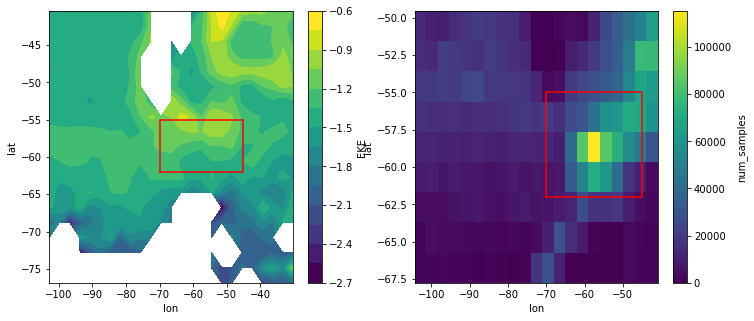

In [45]:
plt.figure(figsize= (12,5))

plt.subplot(121)
np.log10(ds_stats.EKE).sel(lon=slice(lon[0]-35, lon[1]+15), 
                 lat=slice(lat[0]-15, lat[1]+15)).plot.contourf(levels= 15) #, vmax=0.2)

y = [lat[0], lat[0], lat[1], lat[1], lat[0]]
x = [lon[0], lon[1], lon[1], lon[0], lon[0]]

plt.plot(x,y, color='red')

plt.subplot(122)
ds_stats.num_samples.sel(lon=slice(lon[0]-35, lon[1]+5), 
                 lat=slice(lat[0]-5, lat[1]+5)).plot()
plt.plot(x,y, color='red')


In [46]:
def postobox(lon, lat):
    y_box = [lat[0], lat[0], lat[1], lat[1], lat[0]]
    x_box = [lon[0], lon[1], lon[1], lon[0], lon[0]]
    
    return x_box, y_box

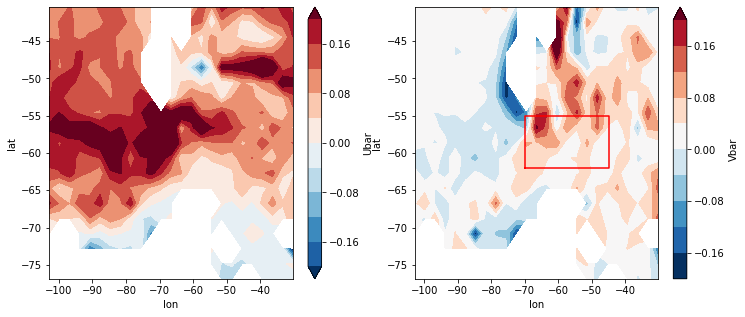

In [47]:
plt.figure(figsize= (12,5))

plt.subplot(121)
ds_stats.Ubar.sel(lon=slice(lon[0]-35, lon[1]+15), 
                 lat=slice(lat[0]-15, lat[1]+15)).plot.contourf(levels= 11, vmax=0.2)




plt.subplot(122)
ds_stats.Vbar.sel(lon=slice(lon[0]-35, lon[1]+15), 
                 lat=slice(lat[0]-15, lat[1]+15)).plot.contourf(levels= 11, vmax=0.2)
plt.plot(x,y, color='red')

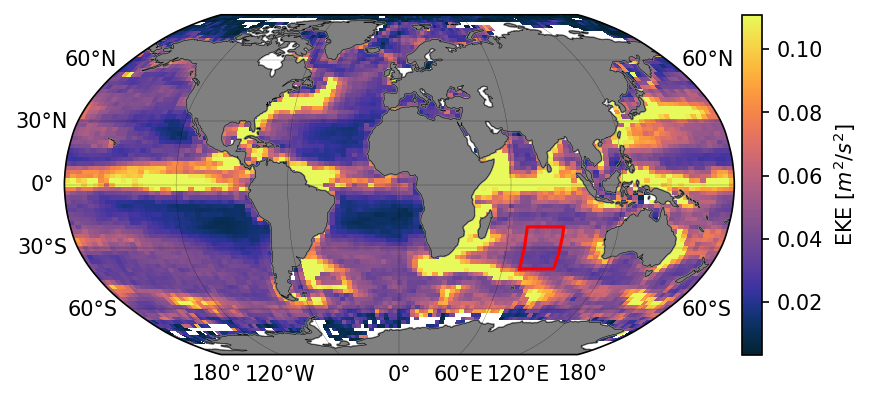

In [60]:

x_c = ds_stats.lon
y_c = ds_stats.lat
# get 1st and 99th percentiles of values to plot to get a useful range for the colorscale
EKE= ds_stats.EKE
v1,v2 = np.nanpercentile(EKE.T,[1,99])

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=0))
#cmap = cmocean.tools.crop(cmocean.cm.matter_r, vmin=0, vmax=v2, pivot=0)
cmap = cmocean.cm.thermal
pcm = ax.pcolormesh(x_c, y_c, 
                    EKE, 
                    cmap=cmap, 
                    transform=ccrs.PlateCarree(),
                    vmin=v1, vmax=v2/2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False



#plt.plot(postobox(lon, lat), color='red')

ax.plot(postobox(lon_ind, lat_ind)[0], postobox(lon_ind, lat_ind)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_agu, lat_agu)[0], postobox(lon_agu, lat_agu)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_wnatl, lat_wnatl)[0], postobox(lon_wnatl, lat_wnatl)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_enatl, lat_enatl)[0], postobox(lon_enatl, lat_enatl)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_acc, lat_acc)[0], postobox(lon_acc, lat_acc)[1], color='red',transform=ccrs.PlateCarree())
# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax);
cb.ax.set_ylabel(r'EKE [$m^2/s^2$]');

plt.savefig('EKE_map.pdf')

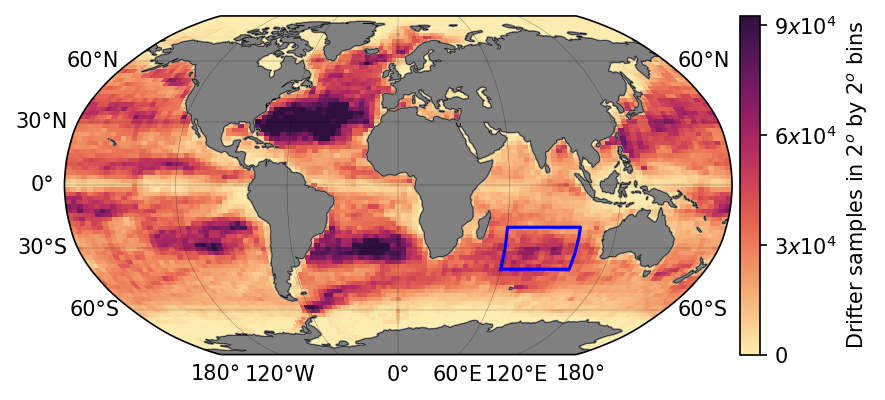

In [80]:

x_c = ds_stats.lon
y_c = ds_stats.lat
# get 1st and 99th percentiles of values to plot to get a useful range for the colorscale
EKE= ds_stats.num_samples
v1,v2 = np.nanpercentile(EKE.T,[1,99])

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=0))
#cmap = cmocean.tools.crop(cmocean.cm.matter_r, vmin=0, vmax=v2, pivot=0)
cmap = cmocean.cm.matter
pcm = ax.pcolormesh(x_c, y_c, 
                    EKE, 
                    cmap=cmap, 
                    transform=ccrs.PlateCarree(),
                    vmin=v1, vmax=v2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False



#plt.plot(postobox(lon, lat), color='red')

ax.plot(postobox(lon_ind, lat_ind)[0], postobox(lon_ind, lat_ind)[1], color='blue',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_agu, lat_agu)[0], postobox(lon_agu, lat_agu)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_wnatl, lat_wnatl)[0], postobox(lon_wnatl, lat_wnatl)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_enatl, lat_enatl)[0], postobox(lon_enatl, lat_enatl)[1], color='red',transform=ccrs.PlateCarree())
#ax.plot(postobox(lon_acc, lat_acc)[0], postobox(lon_acc, lat_acc)[1], color='red',transform=ccrs.PlateCarree())
# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax);
cb.ax.set_yticks([0, 3e4, 6e4, 9e4 ])
cb.ax.set_yticklabels(['0', '$3 x 10^4$', '$6 x 10^4$', '$9 x 10^4$' ])
cb.ax.set_ylabel('Drifter samples in $2^o$ by $2^o$ bins');

plt.tight_layout()
plt.savefig('count_map.pdf')

In [37]:
postobox(lon, lat)[0]

[60, 100, 100, 60, 60]